In [151]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [152]:
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [153]:
datos, metadatos  = tfds.load('mnist', as_supervised=True, with_info=True)
datos

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [154]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\Valentyn\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }"

In [155]:
datos_entratamiento, datos_pueba = datos['test'], datos['train']

In [156]:
datos_entratamiento

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [157]:
datos_pueba

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [158]:
nombres_clases = metadatos.features['label'].names

In [159]:
def normalizar(imagen, label):
    imagen /= 255
    imagen = tf.cast(imagen, tf.float32)
    return imagen, label

In [160]:
datos_entratamiento = datos_entratamiento.map(normalizar)
datos_pueba = datos_pueba.map(normalizar)
datos_entratamiento


<_MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [161]:
datos_entratamiento = datos_entratamiento.cache()
datos_pueba = datos_pueba.cache()
datos_entratamiento

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [182]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(28,28,1)),
#     tf.keras.layers.Flatten(), #blanco y negro
#     tf.keras.layers.Dense(3, activation='relu'),
#     tf.keras.layers.Dense(3, activation='relu'),
#     tf.keras.layers.Dense(3, activation='relu'),
#     tf.keras.layers.Dense(10, activation = 'softmax') # Para neronas como tenemos 10 categories de ropa


# ])

model = keras.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax'),
])

# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

In [183]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [186]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 10), output.shape=(32, 10)

In [ ]:
datosq

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

TypeError: Invalid shape (32, 28, 28, 1) for image data

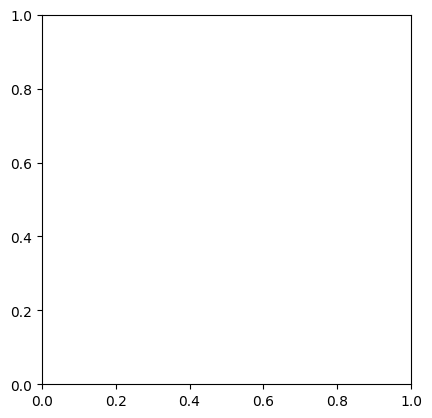

In [185]:
for imagen, label in datos_entratamiento.take(1):
    break
# imagen = imagen.numpy().reshape((28,28))
plt.imshow(imagen, cmap=plt.cm.binary)
plt.suptitle(nombres_clases[label])
plt.show()

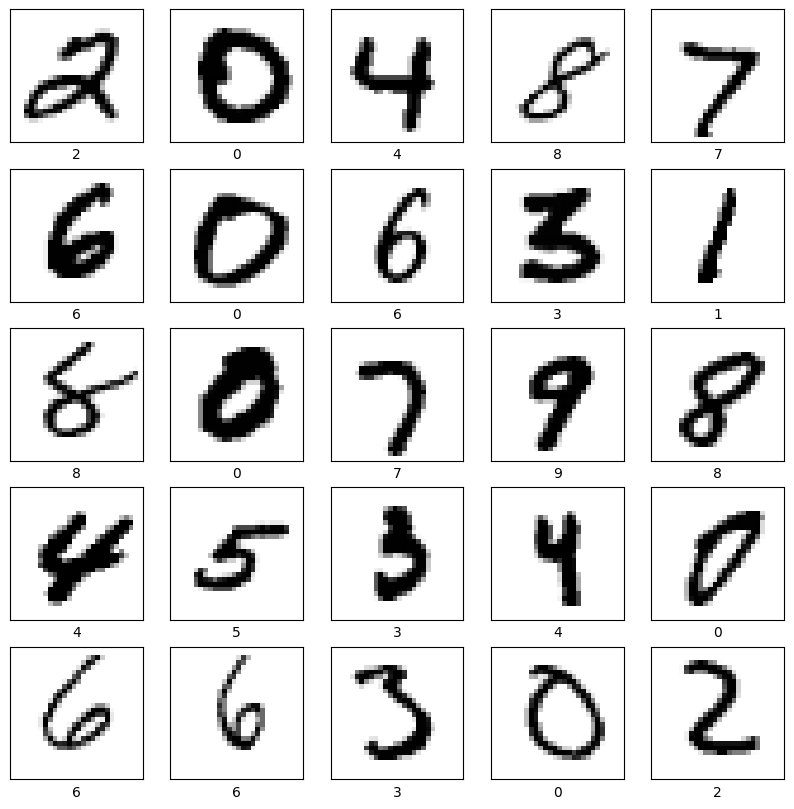

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entratamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [ ]:
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples

In [ ]:
TOMANO_LOTE =32
datos_entratamiento = datos_entratamiento.repeat().shuffle(num_ej_entrenamiento).batch(TOMANO_LOTE)

In [ ]:
import math
historial = model.fit(datos_entratamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TOMANO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1969 - loss: 2.0826
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3084 - loss: 1.6703
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3623 - loss: 1.5386
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3954 - loss: 1.4657
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4158 - loss: 1.4248


In [ ]:
n=tfds.core.DatasetInfo

In [ ]:
n.version

In [ ]:
# imagen_prueba=imagen_prueba.numpy()
# et

In [ ]:
# Compilar la red
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Resumen del modelo
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Valentyn\Documents\Curso\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8996 - loss: 0.3300 - val_accuracy: 0.9844 - val_loss: 0.0471
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9807 - loss: 0.0579
Precisión en el conjunto de prueba: 0.9844
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


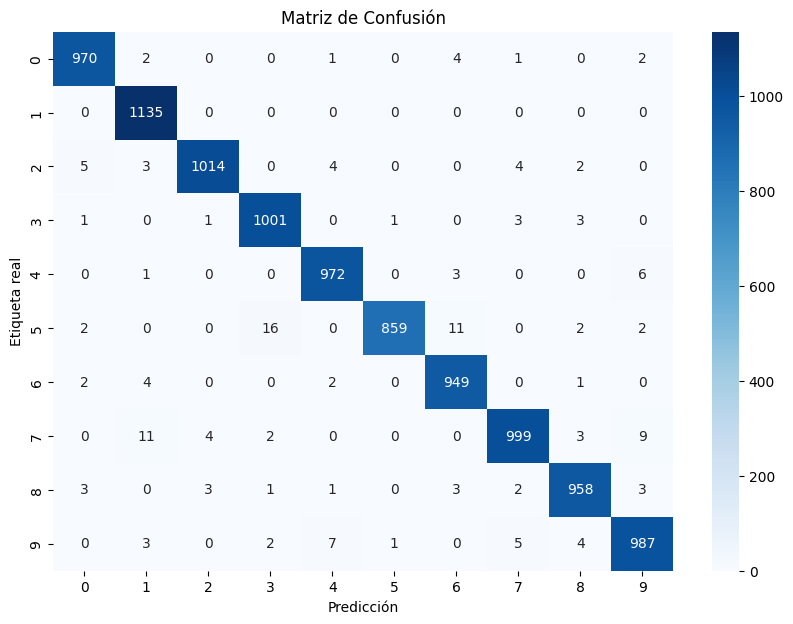

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dígito predicho: 8


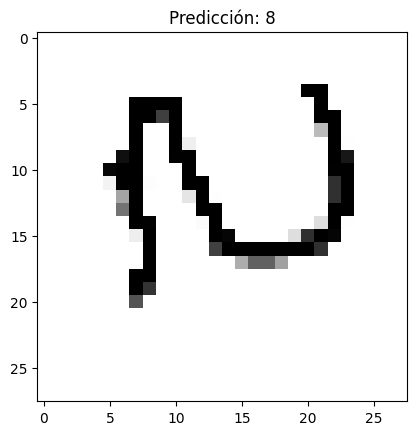

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2

# Cargar y preprocesar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización
x_train = x_train[..., np.newaxis]  # Agregar dimensión de canal
x_test = x_test[..., np.newaxis]

# Convertir etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Definir la arquitectura de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

# Predicciones y matriz de confusión
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión')
plt.show()

# Implementar sistema de inferencia
def inferencia_imagen(ruta_imagen):
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0  # Normalización
    img = img.reshape(1, 28, 28, 1)  # Ajustar forma para la entrada de la CNN
    prediccion = np.argmax(model.predict(img), axis=1)
    print(f"Dígito predicho: {prediccion[0]}")
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {prediccion[0]}')
    plt.show()

# Ejemplo de inferencia
inferencia_imagen('C:\\Users\\Valentyn\\Documents\\Curso\\images\\image.png')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8858 - loss: 0.3610 - val_accuracy: 0.9820 - val_loss: 0.0600
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9847 - val_loss: 0.0513
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9900 - loss: 0.0335 - val_accuracy: 0.9883 - val_loss: 0.0386
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9914 - loss: 0.0258 - val_accuracy: 0.9879 - val_loss: 0.0402
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9931 - loss: 0.0199 - val_accuracy: 0.9908 - val_loss: 0.0345
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.9891 - val_loss: 0.0388
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9899 - val_loss: 0.0376
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9970 - loss: 0

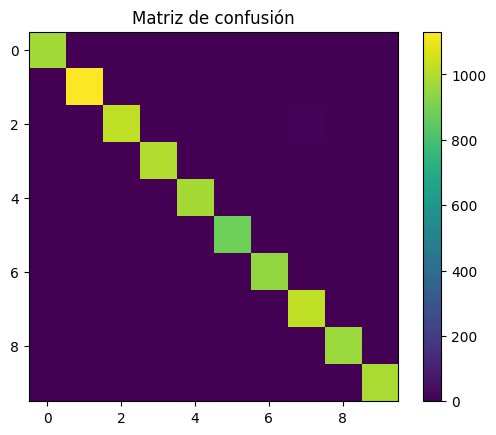

In [188]:
# Importar bibliotecas necesarias
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

# Cargar el conjunto de datos MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocesar los datos
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# Separar el conjunto de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# ...

# Convertir el objetivo a una forma que tenga la misma cantidad de dimensiones que la salida de la red neuronal
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


# Diseñar la arquitectura de la CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar y entrenar la red
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluar el rendimiento
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')

# Mostrar una matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_class)
plt.imshow(conf_mat, interpolation='nearest')
plt.title('Matriz de confusión')
plt.colorbar()
plt.show()

# Preguntas adicionales
# ¿Qué impacto tiene el número de filtros en las capas convolucionales?
# La respuesta es que el número de filtros en las capas convolucionales afecta la capacidad de la red para aprender patrones en los datos.
# Un mayor número de filtros puede mejorar la precisión de la red, pero también puede aumentar el riesgo de sobreajuste.

# ¿Cómo afecta el uso de dropout a la precisión del modelo?
# La respuesta es que el uso de dropout puede mejorar la precisión del modelo al reducir el sobreajuste.
# Sin embargo, un valor de dropout demasiado alto puede disminuir la precisión del modelo.

# ¿Cómo podrías mejorar el rendimiento de la red sin aumentar significativamente la cantidad de parámetros?
# La respuesta es que se pueden utilizar técnicas de regularización, como dropout y L1/L2 regularización, para reducir el sobreajuste.
# También se pueden utilizar técnicas de aumento de datos, como rotación y reflexión, para aumentar la cantidad de datos de entrenamiento.

# Extras (opcional)
# Implementa un sistema de inferencia donde puedas ingresar una imagen de un dígito escrito a mano y la CNN lo clasifique en tiempo real.
# La respuesta es que se puede utilizar la función `predict` de la red para clasificar una imagen de un dígito escrito a mano en tiempo real.
# Se puede utilizar una biblioteca como OpenCV para leer la imagen y preprocesarla antes de pasarla a la red.